# Imports

In [84]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import display
from scipy.stats import pearsonr, spearmanr, kendalltau

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Directories

In [3]:
os.chdir("..")
print(os.getcwd())

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-1


In [4]:
DATA_DIR = os.path.join(os.getcwd(), "data")
print(DATA_DIR)

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-1/data


# The data

In [5]:
file_name = "assignment1_dev_set.csv"

df = pd.read_csv(os.path.join(DATA_DIR, file_name), index_col=0)
cols = df.columns

In [44]:
display(df.shape)
display(cols)

(489, 140)

Index(['Project ID', 'Experiment type', 'Sex', 'Host age', 'BMI',
       'Disease MESH ID', 'Acholeplasma axanthum',
       'Acidaminococcus fermentans', 'Acidaminococcus intestini',
       'Actinomyces lingnae',
       ...
       'Clostridium sphenoides', 'Clostridium spiroforme',
       'Clostridium stercorarium', 'Clostridium symbiosum',
       'Clostridium thermosuccinogenes', 'Clostridium xylanolyticum',
       'Eubacterium brachy', 'Eubacterium dolichum', 'Eubacterium sulci',
       'Ruminococcus gnavus'],
      dtype='object', length=140)

We can see that the `BMI` column is the 6<sup>th</sup> one and the bacterial concentrations start from the 8<sup>th</sup> column up to the last (141<sup>st</sup>)  
Also, since we want to classify `BMI` based **only** on the bacteria in the gut microbiome, we can **exclude** the following columns:
- `Project ID`
- `Experiment type`
- `Disease MESH ID`

Regarding the `Sex` and `Host age` columns, I decided to separate them in order to examine them one by one, and not with the bacterial data.

In [7]:
# drop columns Project ID, Experiment type, Sex, Host age, Disease MESH ID
cols_to_drop = [
    "Project ID",
    "Experiment type",
    "Sex",
    "Host age",
    "BMI",
    "Disease MESH ID"
]

bmi = df["BMI"]
sex = df["Sex"]
age = df["Host age"]
bacteria = df.drop(cols_to_drop, axis=1)

In [8]:
bacteria.head()

,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,Alistipes putredinis,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0.000000,0.000000,0.000000,0.000000,0.017674,0.000000,0.00000,0.0,0.117827,0.005891,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,0.001028,0.000000,0.000000,0.000000,13.015800,0.001542,0.00000,0.0,0.073486,0.403916,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,0.001406,0.000000,0.000000,0.001406,0.002812,0.201074,0.00000,0.0,0.043590,0.105459,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,0.000000,0.008825,0.273562,0.000000,0.044123,0.004412,0.34857,0.0,0.026474,0.586834,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,0.002878,0.037419,7.359970,0.000000,0.872143,0.000000,0.00000,0.0,1.732770,1.004550,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513


## General Statistics

### BMI

In [ ]:
def plot_kde(
        df,
        title="Kernel Density Estimation",
        x_label="Values",
        y_label="Frequency",
        hue_by=None
    ):
    '''Plot Kernel Density Estimation of the given data.

    Parameters
    ----------
    df : pd.Series or pd.DataFrame
        Data to plot.

    title : str, default="Kernel Density Estimation"
        Title of the plot.

    x_label : str, default="Values"
        Label for x-axis.

    y_label : str, default="Frequency"
        Label for y-axis.

    hue_by : pd.Series or pd.DataFrame, default=None
        Data to color the plot by.
    '''

    plt.figure(figsize=(10, 7))

    if isinstance(hue_by, pd.Series) or isinstance(hue_by, pd.DataFrame):
        data = pd.DataFrame({"BMI": df, "Color by": hue_by})
        ax = sns.histplot(
            data=data,
            x="BMI",
            bins=20,
            kde=True,
            hue="Color by",
            alpha=0.6
        )
        ax.get_legend().set_title("")
    else:
        sns.histplot(df, bins=20, kde=True)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.show()

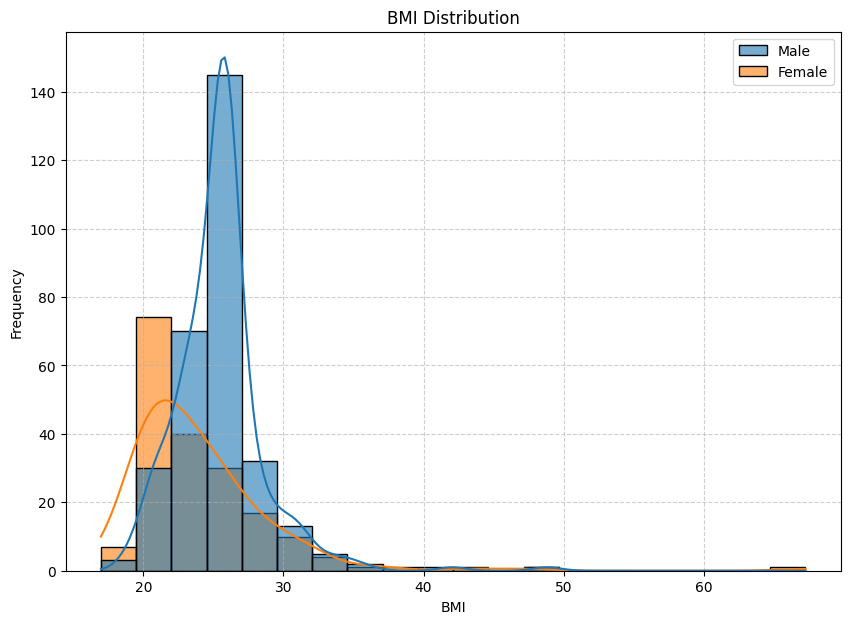

In [10]:
plot_kde(
    bmi,
    title="BMI Distribution",
    x_label="BMI",
    hue_by=sex
)

### Bacteria

In [ ]:
def plot_feature_spans(
        data,
        sort_features=True,
        title="Features"
    ):
    '''Plot the min, max, and mean values of each feature in the dataframe.

    Parameters
    ----------
    data : pandas DataFrame or numpy array
        The data to plot the feature spans for.

    sort_features : bool, default=True
        Whether to sort the features by their mean values.

    title : str, default="Features"
        The title of the plot.

    Returns
    -------
    None
    '''

    if isinstance(data, pd.DataFrame):
        data = data.to_numpy()
    elif not isinstance(data, np.ndarray):
        raise ValueError("Input must be a pandas DataFrame or a numpy array.")

    stats = np.array([
        np.mean(data, axis=0),
        np.min(data, axis=0),
        np.max(data, axis=0)
    ]).T

    if sort_features:
        stats = stats[stats[:, 0].argsort()]

    feature_indices = list(range(len(stats)))

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=feature_indices, y=stats[:, 0], 
        mode='markers',
        marker=dict(color='black', size=12),
        zorder=3,
        name="Mean"
    ))
    
    for i in feature_indices:
        min_val = stats[i, 1]
        max_val = stats[i, 2]
        fig.add_trace(go.Scatter(
            x=[i, i],
            y=[min_val, max_val],
            mode='lines',
            line=dict(color='red', width=5, dash='solid'),
            showlegend=False,
            hoverinfo="none",
            name="Min to Max"
        ))

    fig.add_trace(go.Scatter(
        x=feature_indices, y=stats[:, 1], 
        mode='markers',
        marker=dict(color='red', size=10),
        name="Min"
    ))

    fig.add_trace(go.Scatter(
        x=feature_indices, y=stats[:, 2], 
        mode='markers',
        marker=dict(color='red', size=10),
        name="Max"
    ))

    fig.update_layout(
        title=title,
        xaxis_title="Feature Index",
        yaxis_title="Values",
        template="plotly_white",
        hovermode="x unified",
        height=600,
    )

    fig.show()

In [12]:
plot_feature_spans(bacteria)

Lets normalize them and see what they look like

In [13]:
zscaler = StandardScaler()
mmscaler = MinMaxScaler()

bacteria_zscaled = zscaler.fit_transform(bacteria)
bacteria_mmscaled = mmscaler.fit_transform(bacteria)

In [14]:
plot_feature_spans(bacteria_zscaled, title="Z-Scaled Features")
plot_feature_spans(bacteria_mmscaled, title="MinMax Scaled Features")

### Sex and Age

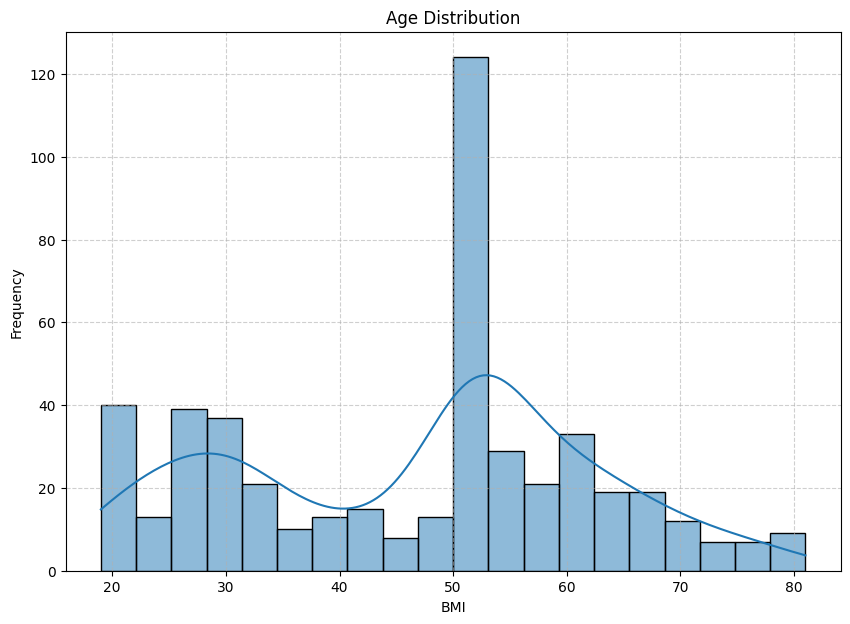

In [15]:
plot_kde(
    age,
    title="Age Distribution",
    x_label="BMI"
)

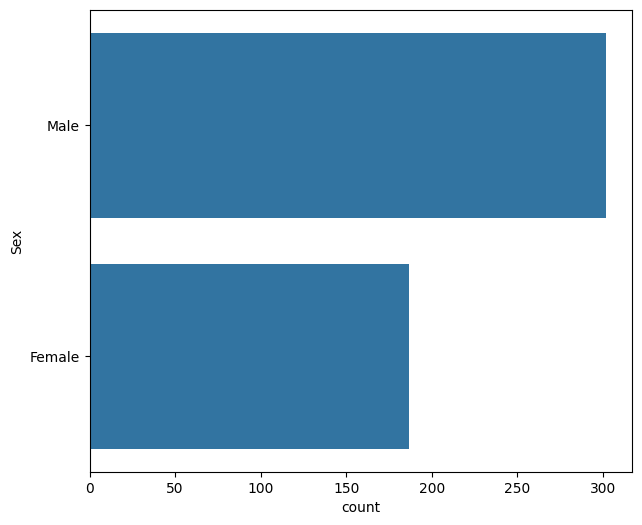

In [16]:
plt.figure(figsize=(7, 6))
sns.countplot(sex)
plt.show()

## Correlations

In [85]:
def correlation_coefficients(
        df,
        against,
        abs_corr=True,
        show_plot=True,
        title="Correlation Coefficients"
    ):
    '''Calculate the correlation coefficients of the given dataframe against the
    given target data.

    The correlation coefficients are calculated using Pearson, Spearman, and Kendall
    methods. The correlation coefficients are then sorted based on the sum of the
    coefficients for each feature. The sorted features are plotted using a scatter
    plot.

    Parameters
    ----------
    df: pd.DataFrame
        The dataframe containing the features to calculate the correlation
        coefficients. The columns of the dataframe are the features.

    against: pd.Series
        The target data to calculate the correlation coefficients against.

    abs_corr: bool
        If True, the absolute value of the correlation coefficients are taken.
        Otherwise, the raw correlation coefficients are used.

    show_plot: bool
        If True, the scatter plot of the sorted correlation coefficients is shown.

    title: str
        The title of the plot.

    Returns
    -------
    corr_coeffs: np.ndarray
        The sorted correlation coefficients of the features against the target data.

    sorted_cols: list
        The sorted columns of the dataframe based on the correlation coefficients.
    '''

    if isinstance(df, pd.Series):
        df = df.to_frame()

    corr_coeffs = np.zeros((df.shape[-1], 3))

    for i, col in enumerate(df.columns):
        pearsons_corr = pearsonr(against, df[col])
        spearmans_corr = spearmanr(against, df[col])
        kendalls_corr = kendalltau(against, df[col])

        corr_coeffs[i, 0] = abs(pearsons_corr[0]) if abs_corr else pearsons_corr[0]
        corr_coeffs[i, 1] = abs(spearmans_corr[0]) if abs_corr else spearmans_corr[0]
        corr_coeffs[i, 2] = abs(kendalls_corr[0]) if abs_corr else kendalls_corr[0]

    row_sums = np.sum(corr_coeffs, axis=1)
    sorted_row_indices = np.argsort(row_sums)[::-1]
    corr_coeffs = corr_coeffs[sorted_row_indices]

    x = list(df.columns)
    sorted_cols = [x[i] for i in sorted_row_indices]

    if not show_plot:
        return corr_coeffs, sorted_cols
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=sorted_cols,
        y=corr_coeffs[:, 0],
        mode="markers",
        marker=dict(size=12),
        name="Pearson"
    ))

    fig.add_trace(go.Scatter(
        x=sorted_cols,
        y=corr_coeffs[:, 1],
        mode="markers",
        marker=dict(size=12),
        name="Spearman"
    ))

    fig.add_trace(go.Scatter(
        x=sorted_cols,
        y=corr_coeffs[:, 2],
        mode="markers",
        marker=dict(size=12),
        name="Kendall"
    ))

    fig.update_layout(
        title=title,
        xaxis_title="Features",
        yaxis_title="Correlation Coefficient",
        template="plotly_white",
        height=700
    )

    fig.show()

    return corr_coeffs, sorted_cols


In [63]:
bacteria_corr_array, bactera_sorted_by_corr = correlation_coefficients(
    bacteria,
    bmi,
    title="Correlation Coefficients of Bacteria against BMI"
)

In [62]:
_ = correlation_coefficients(
    bacteria,
    age,
    title="Correlation Coefficients of Bacteria against age"
)

#### Correlation between features

Let's inspect the feature correlation of the top `n` most correlated bacteria with bmi.

In [149]:
def create_correlated_pairplot(
        data,
        title="Pairplot with Correlation Coefficients",
        scatter_color="#55278c",
        kde_color="#7d47bf"
    ):
    '''Creates a pairplot with Pearson, Spearman, and Kendall correlation
    coefficients overlaid on the upper triangle of the plot and the lower
    triangle replaced with kernel density estimates.

    '''

    def annotate_correlations(x, y, **kwargs):
        '''Annotate the correlation coefficients on the pairplot.'''

        pearson_coef, _ = pearsonr(x, y)
        spearman_coef, _ = spearmanr(x, y)
        kendall_coef, _ = kendalltau(x, y)

        text = "".join([
            f"Pearson: {pearson_coef:.2f}\n",
            f"Spearman: {spearman_coef:.2f}\n",
            f"Kendall: {kendall_coef:.2f}"
        ])
        
        plt.annotate(
            text,
            xy=(0.95, 0.95),
            xycoords='axes fraction',
            ha='right',
            va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.75)
        )

    def plot_mean(x, **kwargs):
        '''Plot the mean of the data on the diagonal of the pairplot.'''

        mean_val = np.mean(x)
        plt.axvline(
            mean_val,
            color='black',
            linestyle='--',
            label=f"Mean: {mean_val:.2f}"
        )
        plt.legend()

    g = sns.pairplot(
        data,
        diag_kind="kde",
        plot_kws={"color": scatter_color},
        diag_kws={"color": kde_color}
    )

    g.map_lower(sns.kdeplot, levels=4, color="black")
    g.map_upper(annotate_correlations)
    g.map_diag(plot_mean)

    plt.suptitle(title, y=1.02)
    plt.show()

In [136]:
n = 5
first_n_bacteria_names = bactera_sorted_by_corr[:n]
first_n_bacteria = bacteria[first_n_bacteria_names]

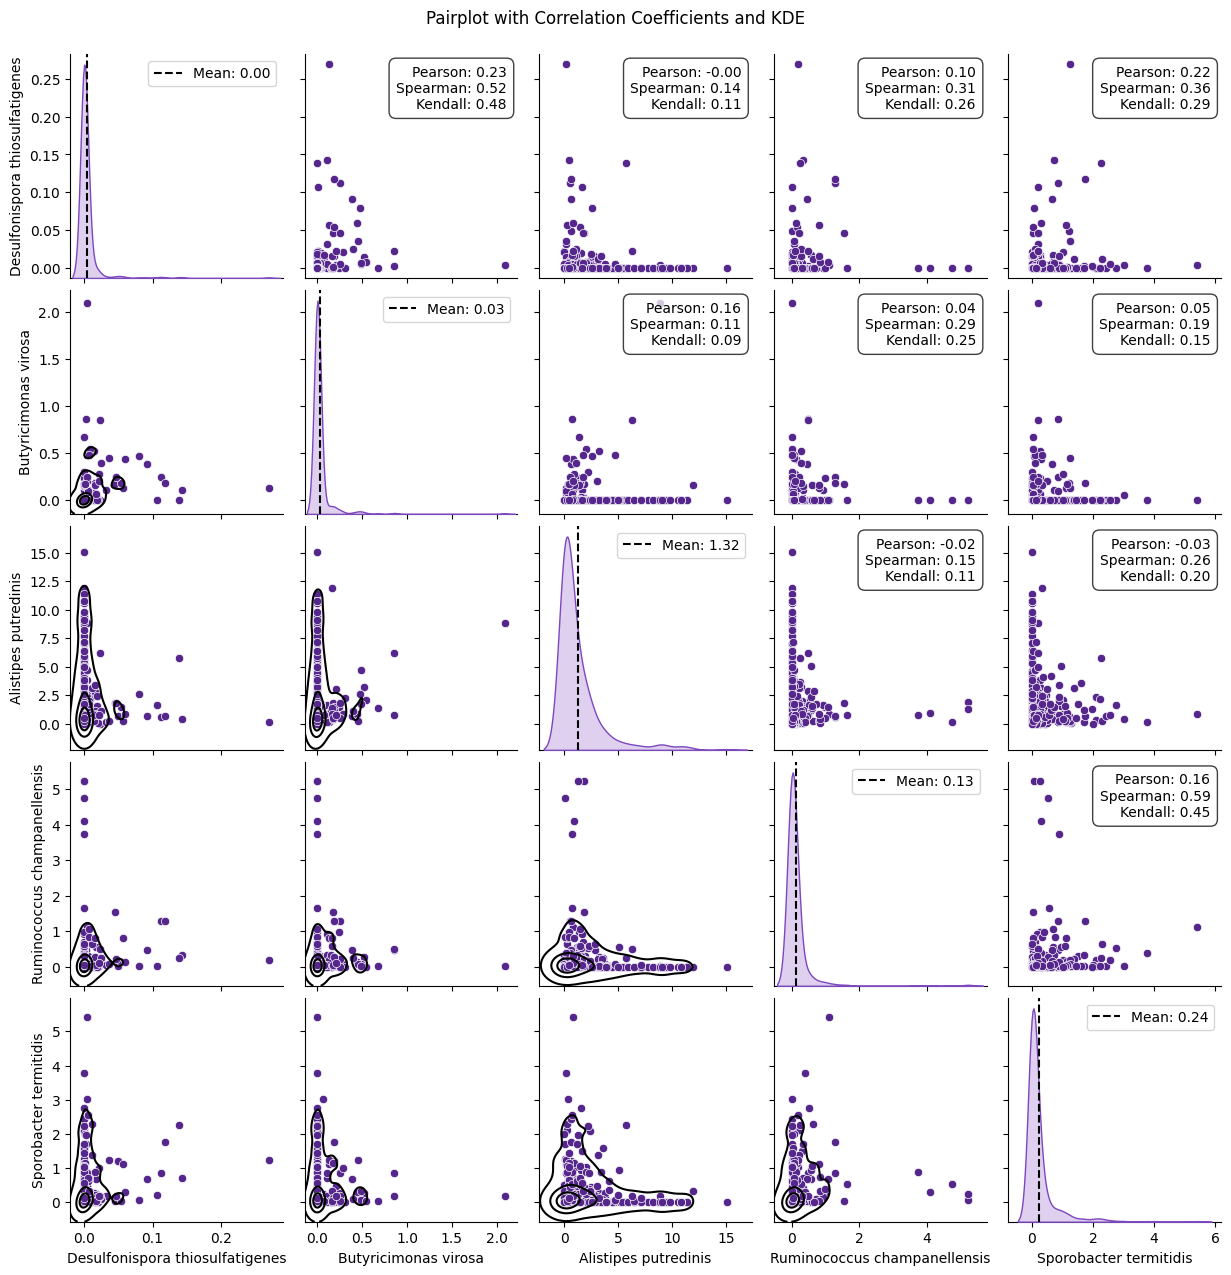

In [150]:
create_correlated_pairplot(
        first_n_bacteria,
        title="Pairplot with Correlation Coefficients and KDE"
        # scatter_color="skyblue",
        # kde_color="skyblue"
    )